# Importing necessary Library
---
---


In [113]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import pickle
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

# Dataset - Lung Cancer
---
---


> **The effectiveness of cancer prediction system helps the people to know their cancer risk with low cost and it also helps the people to take the appropriate decision based on their cancer risk status. The data is collected from the website online lung cancer prediction system .**

> Total no. of attributes:16
*  Attribute information:

1. Gender: M(male), F(female)
2. Age: Age of the patient
3. Smoking: YES=2 , NO=1.
4. Yellow fingers: YES=2 , NO=1.
5. Anxiety: YES=2 , NO=1.
6. Peer_pressure: YES=2 , NO=1.
7. Chronic Disease: YES=2 , NO=1.
8. Fatigue: YES=2 , NO=1.
9. Allergy: YES=2 , NO=1.
10. Wheezing: YES=2 , NO=1.
11. Alcohol: YES=2 , NO=1.
12. Coughing: YES=2 , NO=1.
13. Shortness of Breath: YES=2 , NO=1.
14. Swallowing Difficulty: YES=2 , NO=1.
15. Chest pain: YES=2 , NO=1.
16. Lung Cancer: YES , NO.

In [114]:
df = pd.read_csv('/content/drive/MyDrive/lung cancer final.csv')
df.head()

,NO,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
1,2,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
2,3,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
3,4,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
4,5,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO


# Data-Information
---
---

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   NO                     139 non-null    int64 
 1   GENDER                 139 non-null    object
 2   AGE                    139 non-null    int64 
 3   SMOKING                139 non-null    int64 
 4   YELLOW_FINGERS         139 non-null    int64 
 5   ANXIETY                139 non-null    int64 
 6   PEER_PRESSURE          139 non-null    int64 
 7   CHRONIC DISEASE        139 non-null    int64 
 8   FATIGUE                139 non-null    int64 
 9   ALLERGY                139 non-null    int64 
 10  WHEEZING               139 non-null    int64 
 11  ALCOHOL CONSUMING      139 non-null    int64 
 12  COUGHING               139 non-null    int64 
 13  SHORTNESS OF BREATH    139 non-null    int64 
 14  SWALLOWING DIFFICULTY  139 non-null    int64 
 15  CHEST PAIN             

In [116]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
NO,139.0,70.000000,40.269923,1.0,35.5,70.0,104.5,139.0
AGE,139.0,63.287770,8.488052,21.0,58.0,63.0,70.0,87.0
SMOKING,139.0,1.546763,0.499609,1.0,1.0,2.0,2.0,2.0
YELLOW_FINGERS,139.0,1.539568,0.500235,1.0,1.0,2.0,2.0,2.0
ANXIETY,139.0,1.482014,0.501484,1.0,1.0,1.0,2.0,2.0
PEER_PRESSURE,139.0,1.446043,0.498878,1.0,1.0,1.0,2.0,2.0
CHRONIC DISEASE,139.0,1.496403,0.501795,1.0,1.0,1.0,2.0,2.0
FATIGUE,139.0,1.597122,0.492250,1.0,1.0,2.0,2.0,2.0
ALLERGY,139.0,1.525180,0.501172,1.0,1.0,2.0,2.0,2.0
WHEEZING,139.0,1.489209,0.501691,1.0,1.0,1.0,2.0,2.0


In [117]:
df.isna().sum()

NO                       0
GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [118]:
df.shape

(139, 17)

# Data-Preprocessing
---
---

## Dropping unnecessary column
---


In [119]:
df=df.drop(['NO'],axis=1)

## Standardising columns' names
---

In [120]:
df.columns = df.columns.str.replace(' ','_')

In [121]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE_', 'ALLERGY_', 'WHEEZING',
       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER'],
      dtype='object')

## Lung cancer variables
---

In [122]:
#Replace 1&2 with 0&1 for better understanding
col=['SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE_', 'ALLERGY_', 'WHEEZING',
       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN']
for x in col:
        df[x]=df[x].replace([1,2],[0,1])

In [123]:
df["GENDER"]=df["GENDER"].replace(["M","F"],[1,0])
df["LUNG_CANCER"]=df["LUNG_CANCER"].replace(["YES","NO"],[1,0])

In [124]:
df1=df.replace([2,1],["YES","NO"])
df1.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE_,ALLERGY_,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,0,59,0,0,0,NO,0,NO,0,NO,0,NO,NO,0,NO,0
1,NO,63,NO,NO,NO,0,0,0,0,0,NO,0,0,NO,NO,0
2,0,63,0,NO,0,0,0,0,0,NO,0,NO,NO,0,0,0
3,0,75,0,NO,0,0,NO,NO,NO,NO,0,NO,NO,0,0,NO
4,0,68,NO,0,NO,0,0,NO,0,0,0,0,0,0,0,0


## Duplicate Rows
---

In [125]:
#Duplicate Checking
df.duplicated().sum()

4

In [126]:
# Syntax of drop_duplicates
df=df.drop_duplicates()


In [127]:
df.shape

(135, 16)

In [128]:
df=df.reset_index(drop=True)

## Variable - Age
---

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


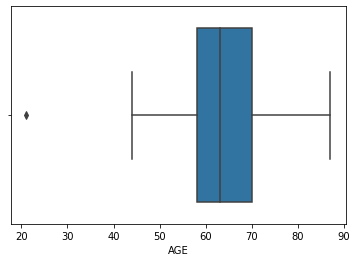

In [129]:
sns.boxplot(df['AGE'])

In [130]:
#Detection '''
#IQR
Q1 = np.percentile(df['AGE'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['AGE'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 


Old Shape:  (135, 16)


In [131]:
# Upper bound
upper = np.where(df['AGE'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['AGE'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("New Shape: ", df.shape)

New Shape:  (134, 16)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


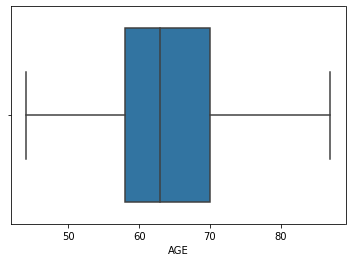

In [132]:
# Box Plot
#import sklearn
#from sklearn.datasets import load_boston
import seaborn as sns
sns.boxplot(df['AGE'])

# Logistic regression
---
---


In [133]:
X=df.drop("LUNG_CANCER",axis=1)
Y=df["LUNG_CANCER"]

In [134]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state=5)

In [135]:
len(x_train), len(x_test)
#len(y_train), len(y_test)

(93, 41)

In [136]:
#Logistic regression and fit the model
model = LogisticRegression(max_iter=500,C=11)
model.fit(X,Y)

# classifier.write_to_pickle('path of file.pkl')
# classifier.save('Model.hd5')

LogisticRegression(C=11, max_iter=500)

In [137]:
y_pred = model.predict(x_test)
y_pred.shape

(41,)

In [138]:
prediction=[round(value) for value in y_pred]
# prediction

In [139]:
# evaluate predictions
accuracy = accuracy_score(y_test, prediction)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 97.56%


In [140]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': model.predict(X)})

In [141]:
Classification_report = classification_report(y_test,y_pred)
clsreport = print(Classification_report)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.97      0.98        32

    accuracy                           0.98        41
   macro avg       0.95      0.98      0.97        41
weighted avg       0.98      0.98      0.98        41



In [142]:
# ROC Curve

Text(0, 0.5, 'True Positive Rate')

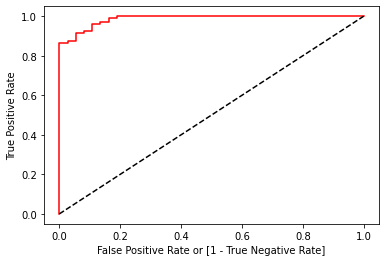

In [143]:
fpr, tpr, thresholds = roc_curve(Y, model.predict_proba (X)[:,1])

auc = roc_auc_score(y_test, y_pred)


plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [144]:
auc

0.984375

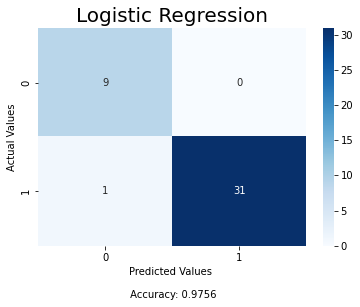

In [145]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, fmt='g', annot=True, cmap="Blues")
accuracy=accuracy_score(y_test, y_pred)

plt.title('Logistic Regression', size = 20)

# Adding figure labels
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values \n \n Accuracy: {}'.format(round(accuracy, 4)))
plt.show()

# K-folds-cross-validation

---
---





In [146]:
scores = cross_val_score(model,X,Y, cv=5)
scores

array([0.81481481, 0.92592593, 0.88888889, 0.85185185, 0.88461538])

In [147]:
scores.mean()*100

87.32193732193731

# Recursive Feature Elimination
---
---

In [148]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [149]:
rfe = RFE(model)
fit = rfe.fit(X, Y)

In [150]:
#Num Features: 
fit.n_features_

7

In [151]:
df.shape

(134, 16)

In [152]:
# Feature Ranking:
fit.ranking_

array([7, 9, 2, 4, 1, 3, 1, 1, 1, 1, 5, 1, 6, 1, 8])

In [153]:
#Selected Features:
a=list(fit.support_)
b=df.columns.to_list()
for x, y in zip(a, b):
    print(x, y, sep='\t\t')

False		GENDER
False		AGE
False		SMOKING
False		YELLOW_FINGERS
True		ANXIETY
False		PEER_PRESSURE
True		CHRONIC_DISEASE
True		FATIGUE_
True		ALLERGY_
True		WHEEZING
False		ALCOHOL_CONSUMING
True		COUGHING
False		SHORTNESS_OF_BREATH
True		SWALLOWING_DIFFICULTY
False		CHEST_PAIN


In [154]:
df2=df[['ANXIETY', 'CHRONIC_DISEASE', 'FATIGUE_', 'ALLERGY_', 'WHEEZING','COUGHING','SWALLOWING_DIFFICULTY']]

In [155]:
X1=df2
Y=df["LUNG_CANCER"]

In [156]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X1,Y, test_size=0.30, random_state=5)

In [157]:
len(x_train), len(x_test)
#len(y_train), len(y_test)

(93, 41)

In [158]:
#Logistic regression and fit the model
model1 = LogisticRegression(max_iter=500,C=11)
model1.fit(X1,Y)

# classifier.write_to_pickle('path of file.pkl')
# classifier.save('Model.hd5')

LogisticRegression(C=11, max_iter=500)

In [159]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model1, open(filename, 'wb'))

In [160]:
#Predict for X dataset
pickle.load(open(filename, 'rb'))
# classifier.read_pickle_file('/content/finalized_model.sav')
y_pred = model1.predict(x_test)
y_pred.shape

(41,)

In [161]:
prediction=[round(value) for value in y_pred]
# prediction

In [162]:
# evaluate predictions
accuracy = accuracy_score(y_test, prediction)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.12%


In [163]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_prob': model.predict(X)})

In [164]:
Classification_report = classification_report(y_test,y_pred)
clsreport = print(Classification_report)

              precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       1.00      0.94      0.97        32

    accuracy                           0.95        41
   macro avg       0.91      0.97      0.93        41
weighted avg       0.96      0.95      0.95        41



Text(0, 0.5, 'True Positive Rate')

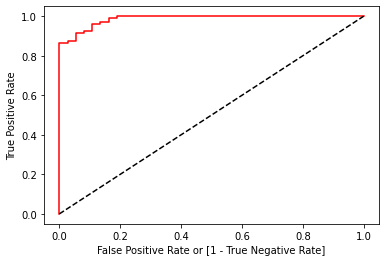

In [165]:
# ROC Curve

fpr, tpr, thresholds = roc_curve(Y, model.predict_proba (X)[:,1])

auc = roc_auc_score(y_test, y_pred)


plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [166]:
auc

0.96875

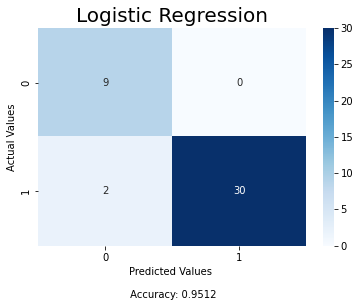

In [167]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, fmt='g', annot=True, cmap="Blues")
accuracy=accuracy_score(y_test, y_pred)

plt.title('Logistic Regression', size = 20)

# Adding figure labels
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values \n \n Accuracy: {}'.format(round(accuracy, 4)))
plt.show()